# COGS 108 - EDA Checkpoint

# Names

- Ivan Chen 
- Leo Fleury
- Daniel Yoon   
- Fei He
- HaoTing Huang

# Research Question

What is the association between the amount of federal money a state receives for disaster relief and the factors, state GDP , number of disasters, and political leaning per year from 2019 to 2022?




## Background and Prior Work


The United States was born out of the colonies' desire to free from the tyranny of a government holding complete control over their commerce and rights. This wariness of a centralized governmental structure influences many aspects of how the government runs today, such as the separation of powers as labeled within the United States Constitution. The states can be considered, to an extent, nations within a nation. A study published in 2023 by smartasset<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) displays one aspect of this relationship - the depth to which states receive their funding from the federal government. But after decades of peace and prosperity as a singular united nation on the world stage - how many maintain this level of self-sufficiency in disasters?

Another source we looked at was a data science project done by Money Geek that looked at which states were most reliant on federal aid. This project is relevant to ours because federal aid reduces the burden on a states budget and how much they can allocate towards disaster relief <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). To compute this, the team at Money Geek did not just look at total federal aid, but looked at federal funding as a percentage of state revenue and return on tax dollars which was a statistic showing how much the state got back for every dollar that they gave the government. What we learned from the metrics used (such as aid as a percentage of state revenue and return on tax dollars) is that often a data set will require a lot of cleaning and development of our own metrics before we can get the answer to our question. Our question being the relation between GDP and a state's amount spent on disaster relief. From the Money Geek project, we also saw how others incorporate graphs into their findings. Money geek did a very good job about making the main findings visible in the titles of their graphs and throughout their paragraphs. For example, one of the main findings from the data set was that states that get the most in federal aid are often republican states. Then, they created a illustrative bar chart to display this. 

Lastly, another project we found relevant from economy.com looking at how natural disasters affect national GDP, which we also found relevant to our project as it relates to natural disasters and uses GDP as a metric. However, our project takes a different angle by using GDP as a measure of a states self sufficiency and seeing how that correlates to how much disaster relief aid that state gets. Some relevant take-aways from the source were that natural disasters only have a minor impact on national GDP but can be very impactful for local GDP. For example, from economy.com calculations, real GDP growth for New Orleans fell 20% at an annual rate in the third quarter of 2005 after Katrina <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). 

1. <a name=\"cite_note-1\"></a> [^](#cite_ref-1) Jaclyn, D. (14 Apr. 2023)  Where Your Tax Dollars Go: States Most Dependent on the Federal Government – 2023 Study *smartasset* https://smartasset.com/data-studies/states-most-dependent-federal-government-2023 
2. <a name=\"cite_note-2\"></a> [^](#cite_ref-2) MoneyGeek. (n.d.). States Most Reliant on the Federal Government., from https://www.moneygeek.com/living/states-most-reliant-federal-government/
3. <a name=\"cite_note-3\"></a> [^](#cite_ref-3) Moody's Analytics. (n.d.). How Natural Disasters Affect US GDP. Economy.com., from https://www.economy.com/economicview/analysis/296804/How-Natural-Disasters-Affect-US-GDP


# Hypothesis


We predict that in the United States in 2022, states with lower Gross Domestic Product (GDP) and historical Republican inclinations will be associated with an increase in federal disaster relief funding (as a percentage of the state's GDP). Conversely, states with higher GDP and historical Democratic ties will receive a lower percentage of their GDP in federal disaster relief funding. This study aims to analyze data over the past two decades to investigate these relationships, employing statistical analysis methods to understand the impact of economic status and political affiliation on disaster relief funding.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Gross Domestic Product (GDP) by state
  - Link to the dataset: https://usafacts.org/metrics/gross-domestic-product-gdp-by-state/?adjustment=None&timeGranularity=Yearly
  - Number of observations: 45
  - Number of variables: 51
- Dataset #2 
  - Dataset Name:
  - Link to the dataset: https://www.bea.gov/data/gdp/gdp-state
  - Number of observations:
  - Number of variables:
- Dataset #3
  - Dataset Name: Emergency Management Performance Grants
  - Link to dataset: https://www.fema.gov/openfema-data-page/emergency-management-performance-grants-v2
  - Number of observations: 19615
  - Number of variables: 9
- Dataset #4
  - Dataset Name: Public Assistance Funded Projects Detail
  - Link to dataset: https://www.fema.gov/openfema-data-page/public-assistance-funded-projects-details-v1
  - Number of observations: 805,572
  - Number of variables: 22


For our first dataset, GDP by state, is a dataset that gives us each states, GDP by year. The dataset includes data from 1977 - 2022, with the GDP of each state per year. The states are organized by alphabetical order and the year from 2022 down to 1977. As for data, majority of it are integers, which simplifies it a little. As for cleaning the dataset, we want to extract data from 2019 to 2022 only, which means we need to filter more than half the dataset.

The second dataset by BEA, it is a dataset that provides the GDP by each state, seperated by region from most to least. This dataset includes each states GDP by quarter and takes inflation into account (2017 Dollar value). This dataset has many tables with valuable information, but we are focused on Tables 1, 3, and 5. Table 2 includes data about the Personal Income per state in the same format as Table 1. A few important varaibles in this dataset would include States, Regions, Quarters, and Total. These are the main variables that will help us analyze the data. Since the data is already well organized, the only things we would need to do is find missing data, if there is any, and understand why it may be missing. 

Our third dataset, Emergency Managment Performance Grants, is a detailed dataset of emergency funding each state as received. This dataset inlcudes every agency that has provided a specific state emergency funding. The data variables includes states, id, agency name, closing and opening date, and more. We are mainly looking for state, amount and reporting period (2019-2022), so we can focus on extracting those variables out. With the large amount of agency's in each state, it would be best to combine it all under the state, where we have the total number of funding per state. 

Our last dataset, Public Assistance Funded Projects Detail, is another very detailed dataset that has information about emergency funding. To be more exact, it has information about what kind of natural disasters, which county and it's county code, project amount, federal share obligated, total obligated, and more. For this project, knowing what specific natural disaster and how much a state got because of that isn't our main goal, so we would have to sort it by year, maintaining our goal of finding data from 2019-2022.

With our datasets, it would be useful to look at them and understand if a state with a higher GDP gets more emergency funding overall. We want to see the relationships between the two and with the information we have, it would help prove our research question.

### Dataset #1 Emergency Management Performance Grants 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)

url = 'Data/EmergencyManagementPerformanceGrants.csv'
df = pd.read_csv(url)
df['state'].unique()
df_not_state = df['state'].str.contains('Puerto Rico|American Samoa|District of Columbia|Northern Mariana Islands|Guam|Virgin Islands')
df = df[~df_not_state] #filter to only include US states
df['state'].unique().size #check to see that our state column only has 50 values

def standardize_reportingPeriod(string):
    
    string = string.lower().strip()
    
    if '2014' in string:
        output = 2014
    elif '2015' in string:
        output = 2015
    elif '2016' in string:
        output = 2016
    elif '2017' in string:
        output = 2017
    elif '2018' in string:
        output = 2018
    elif '2019' in string:
        output = 2019
    elif '2020' in string:
        output = 2020
    elif '2021' in string:
        output = 2021
    elif '2022' in string:
        output = 2022
    # Otherwise, if uncaught - keep as is
    else:
        output = string
    
    return output

df['reportingPeriod'] = df['reportingPeriod'].apply(standardize_reportingPeriod)
df = df.query('reportingPeriod >= 2019') #filter so lowest year is 2017 to match other data

df_grouped = df.groupby(by = ['state', 'reportingPeriod']).sum()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns = {'reportingPeriod': 'year', 'fundingAmount' : 'funding'})
df_grouped['funding'] = df_grouped['funding'].astype(int)

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New hampshire": "NH", "New jersey": "NJ",
    "New mexico": "NM", "New york": "NY", "North carolina": "NC", "North dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode island": "RI", "South carolina": "SC",
    "South dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

df_grouped['state'] = df_grouped['state'].str.lower().str.capitalize().map(us_state_to_abbrev)
EMPG = df_grouped #naming to something we will remember
EMPG['year'] = EMPG['year'].astype(int) # change to integers
EMPG

C:\Users\leofl\AppData\Local\Temp\ipykernel_20088\558211804.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(by = ['state', 'reportingPeriod']).sum()


,state,year,funding
0,AL,2019,5728503
1,AL,2020,5810021
2,AL,2021,7446681
3,AL,2022,6681181
4,AK,2019,3093229
...,...,...,...
195,WI,2022,7311711
196,WY,2019,2991828
197,WY,2020,3033266
198,WY,2021,3889834


### Dataset #2 Disaster Declarations by State

In [2]:
url2 = 'Data/DisasterDeclarationsSummaries.csv'
df2= pd.read_csv(url2)

df2 = df2.query('2023 > fyDeclared >= 2019 ') # make sure to include equals so 2017 included
df2.sort_values(by = 'fyDeclared', ascending = True) # set to true so make sure have correct info
df2 = df2.groupby(by = ['state', 'fyDeclared']).size().reset_index(name= 'disasters') # use size for num of disasters instead of sum & give column name
df2 = df2.rename(columns={'fyDeclared': 'year'})
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
                'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
                'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
                'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Filter the DataFrame to only include rows where the state code is in the list of valid states
df2 = df2[df2['state'].isin(valid_states)]
df2

# states didnt have disasters every year so we need to create columns with 0 for years no disasters were declared
import itertools

years = [2019, 2020, 2021, 2022]
combinations = list(itertools.product(valid_states, years)) # Use itertools.product to get all combinations of states and years -- this works like a double sum where the valid states is fixed and its looking at all the states to match
combinations
df2_combinations = pd.DataFrame(combinations, columns=['state', 'year'])
df2_combinations
df2_merged = pd.merge(df2_combinations, df2, on = ['state', 'year'], how = 'left')# how on left so that df2_combinations has all rows saved and df2 added -- state and year pairs will get na values
df2_merged['disasters'].fillna(0, inplace= True) #in place so a new data frame is not created and old one is kept
df2_merged['disasters'] = df2_merged['disasters'].astype(int) # astype converts to a integer
disasters =  df2_merged #naming to something we will remember
disasters['year'] = disasters['year'].astype(int) # change to integers
disasters

,state,year,disasters
0,AL,2019,36
1,AL,2020,257
2,AL,2021,30
3,AL,2022,2
4,AK,2019,9
...,...,...,...
195,WI,2022,0
196,WY,2019,0
197,WY,2020,51
198,WY,2021,0


### Dataset #3 State Historical Political Leaning

In [3]:
url3 = 'Data/1976-2022-house.csv'
election_data= pd.read_csv(url3)

elections_post_2017 = election_data[election_data['year'] > 2019]
relevant_elections = elections_post_2017[elections_post_2017['party'].isin(['DEMOCRAT', 'REPUBLICAN'])]
grouped_elections = relevant_elections.groupby(['state', 'year', 'party'])['candidatevotes'].sum().reset_index()
winning_party = grouped_elections.sort_values('candidatevotes', ascending=False).drop_duplicates(['state', 'year'])
winning_party = winning_party.sort_values(by = 'state')
winning_party = winning_party.drop(columns= 'candidatevotes')


#df.reindex -- confrom DF to a new index w. optional filling -- places NA in locastions having no value in teh previous index
# we reindex the winning_party data frame to do this
# we use pd.MultiIndex.from_product instead of iterools.prodcut(state, year) bcs it returns a list instead of a multiindex
winning_party_indexed = winning_party.set_index(['state', 'year'])
state = winning_party_indexed.index.levels[0]
year = [2019,2020,2021,2022]
multi_index = pd.MultiIndex.from_product([state, year])
winning_party_indexed = winning_party_indexed.reindex(multi_index)
winning_party_indexed_filled = winning_party_indexed.groupby(level=0).fillna(method='ffill').fillna(method='bfill').reset_index()
winning_party_indexed_filled = winning_party_indexed_filled.rename(columns = {'level_1' : 'year'})

#the rest of our data tables use state postal codes instead of the full names
#using a dictionary I found on GitHub we can map these states to their postal codes
us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New hampshire": "NH", "New jersey": "NJ",
    "New mexico": "NM", "New york": "NY", "North carolina": "NC", "North dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode island": "RI", "South carolina": "SC",
    "South dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

winning_party_indexed_filled['state'] = winning_party_indexed_filled['state'].str.lower().str.capitalize().map(us_state_to_abbrev)
state_political_leaning = winning_party_indexed_filled #naming to something will actually remember
state_political_leaning['year'] = state_political_leaning['year'].astype('int32')
state_political_leaning


,state,year,party
0,AL,2019,REPUBLICAN
1,AL,2020,REPUBLICAN
2,AL,2021,REPUBLICAN
3,AL,2022,REPUBLICAN
4,AK,2019,REPUBLICAN
...,...,...,...
199,WI,2022,REPUBLICAN
200,WY,2019,REPUBLICAN
201,WY,2020,REPUBLICAN
202,WY,2021,REPUBLICAN


### Dataset #4 GDP by State

In [4]:
# Log onto the BEA website (Bureau of Economic Analysis), the official site for government data.
# Navigate to the "Data" section, select "GDP," and then choose "GDP by State."
# Go to "Interactive Data" and select "Interactive Tables: GDP by State."
# Choose "ANNUAL GROSS DOMESTIC PRODUCT (GDP) BY STATE," then "SAGDP2 GDP in current dollars."
# Select the United States, and view all statistics in the table.
# In the resulting table, select the first row's line code where the description is "all industry total."
# The resulting table displays the GDP by state in millions of current dollars, with data collected from 2017 to 2022.

url4 =  "Data/GDP by state (2017-2022).csv"

df4 = pd.read_csv(url4, skiprows = 3) #skip first 3 rows because they are a description
df4 = df4.drop(columns = ['GeoFips', '2017', '2018'])
df4 = df4.rename(columns= {'GeoName': 'state'})
df4_bad_GeoName = df4['state'].str.contains('District of Columbia|New England|nited States *|Mideast|Great Lakes|Plains|Southeast|Southwest|nan|Rocky Mountain|Far West').fillna(False) #dealing with NA values
df4 = df4[~ df4_bad_GeoName] #this removes all the regions and territories we don't care about 
indexes_to_drop = df4.iloc[-4:].index #get the last 4 rows index using iloc
df4 = df4.drop(indexes_to_drop)
melted_df = pd.melt(df4, id_vars=['state'], value_vars=['2019', '2020', '2021', '2022'], var_name='year', value_name='amount')
melted_df = melted_df.sort_values('state')
melted_df

#using the same code I used on the state leaning dat set we change the years to their postal codes

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
}

melted_df['state'] = melted_df['state'].map(us_state_to_abbrev)
gdp_by_state = melted_df.rename(columns = {'amount': 'GDP'})
gdp_by_state #naming to something we will remember
gdp_by_state['year'] = gdp_by_state['year'].astype(int) # change to integers
gdp_by_state

,state,year,GDP
0,AL,2019,234526.4
50,AL,2020,235118.3
150,AL,2022,281569.0
100,AL,2021,257986.5
151,AK,2022,65698.8
...,...,...,...
48,WI,2019,347398.6
99,WY,2020,36675.5
49,WY,2019,39971.4
149,WY,2021,42176.2


# Results

## Exploratory Data Analysis

### Merged Data Sets

In [5]:
#the data sets we have now are EMPG, disasters, state_political_leaning, & gdp_by_state 
#we have individually pre procesesed every data frame so that merging will be a smooth process
pd.set_option('display.max_rows', 10)
master_df = disasters.merge(EMPG)
master_df = master_df.merge(state_political_leaning)
master_df = master_df.merge(gdp_by_state)
master_df

,state,year,disasters,funding,party,GDP
0,AL,2019,36,5728503,REPUBLICAN,234526.4
1,AL,2020,257,5810021,REPUBLICAN,235118.3
2,AL,2021,30,7446681,REPUBLICAN,257986.5
3,AL,2022,2,6681181,REPUBLICAN,281569.0
4,AK,2019,9,3093229,REPUBLICAN,54469.9
...,...,...,...,...,...,...
195,WI,2022,0,7311711,REPUBLICAN,396209.3
196,WY,2019,0,2991828,REPUBLICAN,39971.4
197,WY,2020,51,3033266,REPUBLICAN,36675.5
198,WY,2021,0,3889834,REPUBLICAN,42176.2


### Section 1 - Correlation between Num. of Disasters and Funding Allocated

#### Code
First, we create a pivot table using values from the ‘disasters’ and ‘funding’ columns, summing these values for each state. This data is plotted using a seaborn scatterplot, with the horizontal axis representing the number of disasters and the vertical axis indicating the funding received from FEMA. A for loop is used to plot each of the 50 states on the graph, identified by their two-character abbreviations. We then calculate and plot a line of best fit. The latter part of the code is dedicated to labeling the graph. For the OLS analysis, funding is the dependent variable, and the number of disasters is the independent variable.
#### Intepretation
The data reveals the correlation between the number of disasters a state experiences and the funding it receives from FEMA through its Emergency Management Performance Grants, encompassing the years 2019 to 2022. Although a positive linear correlation exists, it is relatively weak. The null hypothesis is rejected since the P-value is 0.0158, indicating a less than 2% chance of obtaining the same result if the null hypothesis were true. As this value is below 0.05, we reject the null hypothesis. The OLS results show an R-squared value of 0.115, suggesting that only 11.5% of the variance in funding can be predicted by the number of disasters. This confirms that the correlation is not as significant as hypothesized. Examining the coefficients, the intercept is approximately $22,150,000, indicating the baseline federal funding a state would receive without any disasters. The disaster coefficient is roughly $29,270, meaning that each disaster correlates to an increase of about $30,000 in federal funding. Overall, the data suggests that disaster funding is not solely dependent on the number of disasters. This is further supported by the fact that many states fall below the line of best fit. States like Maine and Mississippi, with more federally declared disasters, received less funding than Florida, which had fewer disasters. Therefore, we must explore other correlations in the data, such as between GDP, FEMA funding, the number of disasters, and political leaning.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

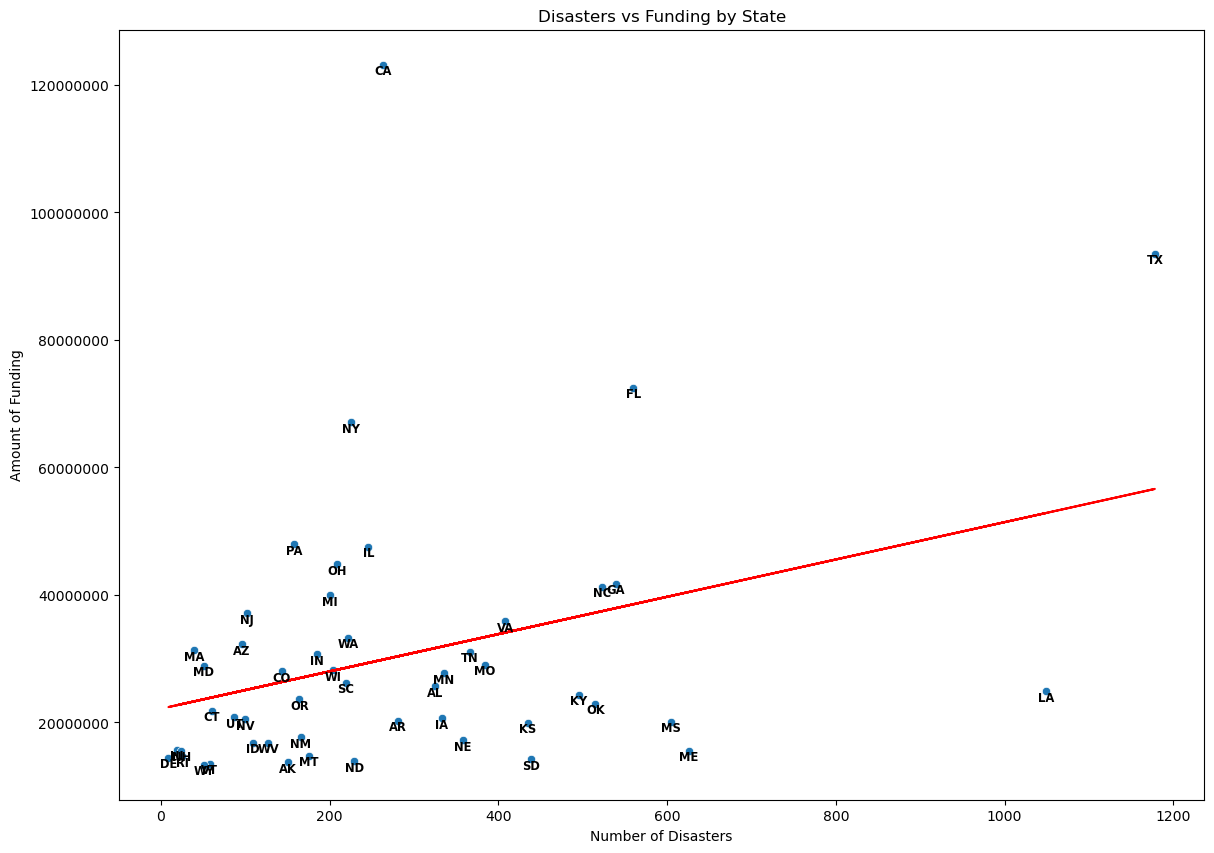

In [7]:
pivot = pd.pivot_table(master_df, values= ['disasters', 'funding'], index= 'state', aggfunc = 'sum')

plt.figure(figsize =(14,10))
scatter = sns.scatterplot(
    data = pivot,
    x = 'disasters',
    y = 'funding',
)

for state, (x, y) in pivot.iterrows():
    plt.text(x, y, state, horizontalalignment='center', verticalalignment = 'top', size='small', color='black', weight='semibold')

# calculate line of bet fit
x = pivot['disasters']
y = pivot['funding']
m, b = np.polyfit(x, y, 1)

# add to plot 
plt.plot(x, m*x + b, color='red')

plt.ticklabel_format(style='plain', axis='y')      
plt.ticklabel_format(style='plain', axis='x')
scatter.set_title('Disasters vs Funding by State')
scatter.set_xlabel('Number of Disasters')
scatter.set_ylabel('Amount of Funding')
plt.show()

In [8]:
import patsy
import statsmodels.api as sm

In [9]:
outcome_1, predictors_1 = patsy.dmatrices('funding ~ disasters', data= pivot, return_type='matrix')
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# Check the summary for results
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                funding   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     6.262
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0158
Time:                        15:37:09   Log-Likelihood:                -910.06
No. Observations:                  50   AIC:                             1824.
Df Residuals:                      48   BIC:                             1828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.215e+07   4.29e+06      5.166      0.0

### Section 2 - Disaster Funding over the years by Party

#### Code
In Section 2, we focus on analyzing FEMA disaster funding across different years and comparing it based on political parties (Democrat vs. Republican). We use Seaborn to generate a categorical bar chart from this aggregated data, plotting the total amount of disaster funding for each year, represented in different colors by political party. The chart displays funding on the Y-axis, while the X-axis showcases the 2019 to 2022 period, complete with descriptive titles and labels for both axes using `plt.ticklabel_format`, `plt.xlabel`, and `plt.ylabel`. The bar chart visualizes trends in disaster funding over the years, facilitating comparisons between the amount of FEMA funding in Democratic and Republican states, and is intended to reveal any patterns or differences that may exist between the two political parties.

#### Interpretation
Based on the results shown in the data, it appears that disaster relief funding for Democratic and Republican states changes over the years (2019-2022). In 2019 and 2022, Republican states received slightly more funding than Democratic states. In 2021, states of both parties received significant increases in funding, with Republican states consistently receiving more total funding than Democratic states. In 2022, Republican states maintained similar levels to 2021, while Democratic states experienced a substantial reduction in funding, returning to levels comparable to 2020. As can be seen, political preferences are considered relevant to the distribution of disaster relief funds, as evidenced by the differences and trends in the amounts received by states of different political affiliations over the years. This suggests that while the occurrence of a disaster may affect the distribution of funds, political factors may also play an important role in the distribution of federal disaster relief funds.

Text(44.300306712962964, 0.5, 'Total Funding (USD)')

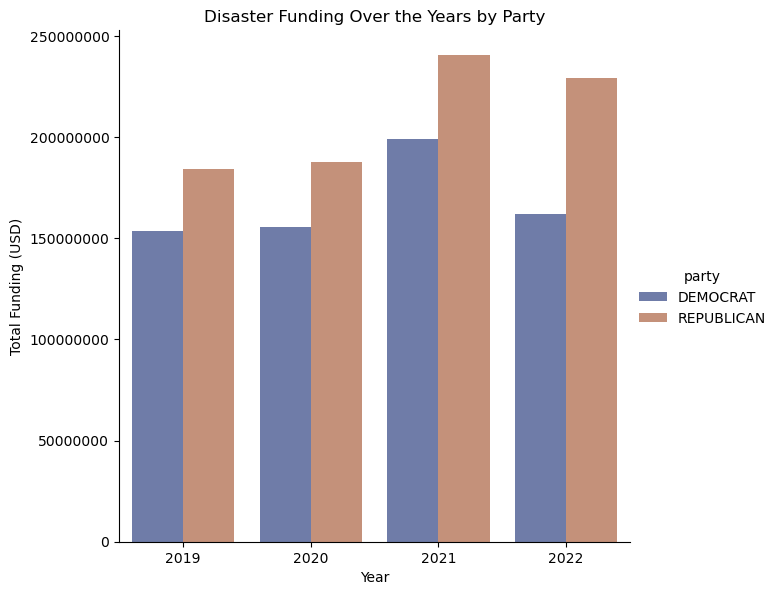

In [10]:
df_grouped = master_df.groupby(by=['year', 'party', ])['funding'].sum().reset_index()

bar_plot= sns.catplot(
    data=df_grouped, 
    kind="bar", 
    x="year",
    y = "funding",
    hue="party",
    hue_order = ["DEMOCRAT", "REPUBLICAN"], #hue order to specify the way you want vars to show
    palette="dark", 
    alpha=.6, 
    height=6
)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Disaster Funding Over the Years by Party')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')

### Section 3 - Ratio of funding divided by GDP

#### Code
In this code, we delve into examining the ratio of funding to GDP using a bar plot, while utilizing a Pandas Pivot Table. On the x-axis, we display the funding as a percentage of GDP, and on the y-axis, we list the states. We adjust the GDP values in the pivot table to show actual dollar amounts instead of millions by multiplying by 1,000,000. This adjustment enables us to calculate the percent of funding relative to each state's GDP. After sorting our data, we use Seaborn to create a bar plot, visualizing the emergency funding as a percentage of GDP for each state.
#### Intepretation
Looking at our data, it shows the correlation between the sum of the emergency funding a state receives and the state's GDP from 2019 to 2022, arranged from lowest to highest. From this, we can see that New York receives the least amount of emergency funding relative to its GDP, while Vermont has the highest percentage of emergency funding relative to its GDP. However, many factors contribute to why a state like Vermont has the highest percentage of emergency funding. These factors include the number of disasters, population, emergency funding, and more. We can observe that states with a higher GDP and more disasters typically have the lowest percentage of emergency funding relative to their GDP compared to those states with a lower GDP and fewer disasters.


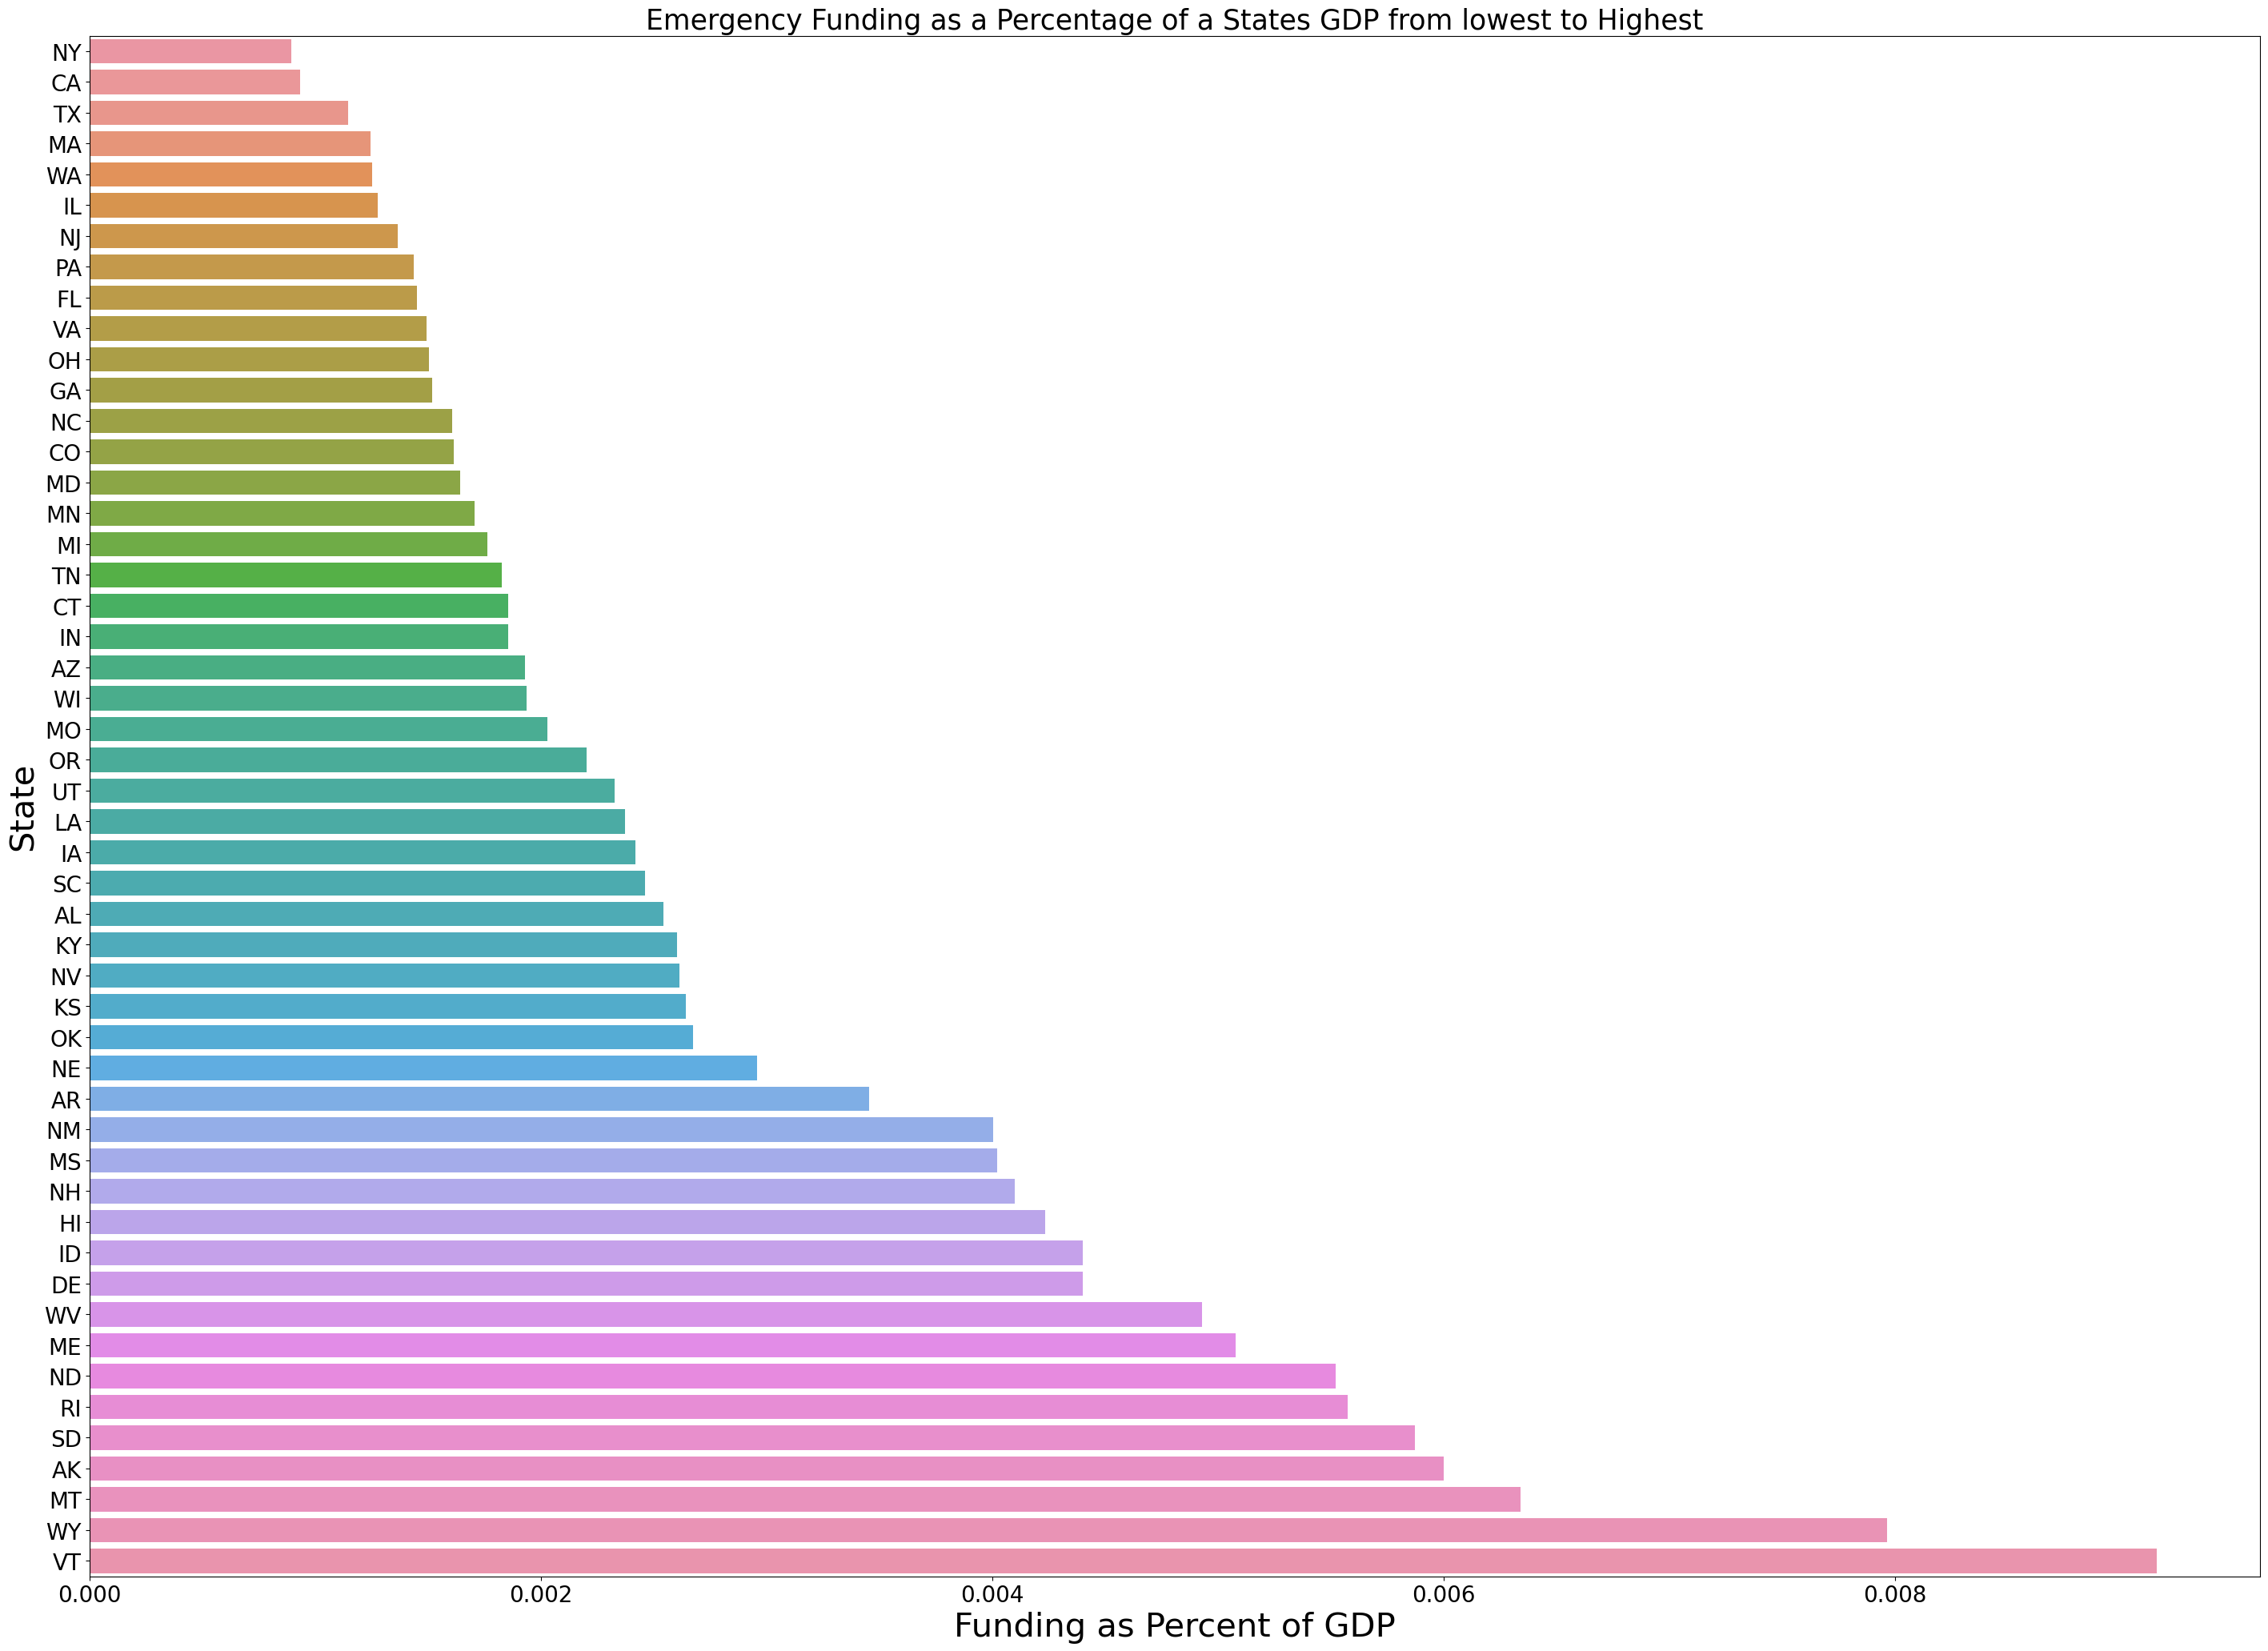

In [11]:
pivot2 = pd.pivot_table(master_df, values= ['funding', 'GDP'], index= 'state', aggfunc = 'mean').reset_index()
pivot2['GDP'] = pivot2['GDP']*1000000 #get into dollar amount instead of millions
percentage_of_gdp = pivot2['funding']/pivot2['GDP'] *100
pivot2['funding_as_percent_of_GDP'] = percentage_of_gdp
pivot2 = pivot2.sort_values(by ='funding_as_percent_of_GDP')

ig, ax = plt.subplots(figsize=(35,25))
sns.barplot(
    x='funding_as_percent_of_GDP',
    y='state', 
    data= pivot2, 
    ax=ax
)

ax.set_title('Emergency Funding as a Percentage of a States GDP from lowest to Highest', fontsize = 25)
ax.set_xlabel('Funding as Percent of GDP', fontsize=30) # set_xlabel  better to put name and choose font size (we need bigger since its a big plot)
ax.set_ylabel('State', fontsize=30)


ax.tick_params(axis='x', labelsize=20) #this is to make our state values bigger too using tick_params
ax.tick_params(axis='y', labelsize=20)

plt.show()

### Section 4: Correlation between GDP and Funding

#### Code
Our fourth and final section consists of three parts, two of which involve code and graphs we have previously generated, but this time focusing on the correlation between GDP and the amount of funding each state receives. We utilize `pivot2`, derived from `master_df`, to calculate disaster relief funding and GDP, indexed by state. Initially, we create a scatter plot using seaborn's `.catplot`, where each point represents GDP on the x-axis and funding on the y-axis, drawing data from the ‘GDP’ and ‘funding’ columns of pivot2, respectively. We then iterate through each row in the DataFrame, adding text annotations to the scatter plot points to label the states they represent. Using np.polyfit, we perform linear regression on the data points in the scatter plot, employing polyfit to establish a line of best fit that numerically illustrates the correlation between GDP and Disaster Relief Funding amount. We then overlay this line onto the existing figure, showcasing each scatter plot point.

Following this, as we are dealing with linear regression again, we apply OLS regression analysis to obtain summary statistics, testing the validity and reliability of our data. In this instance, we name our OLS regression analysis `res_2` to avoid confusion with `res1`. Finally, we generate a bar chart using seaborn’s `.barplot()` to identify which states have the highest number of disasters. This allows us to compare these findings with the states receiving the most funding.

#### Intepretation
Regarding the correlation between the two variables, the amount of funding a state receives and a country's GDP is the strongest relationship in our data and is likely the most interesting. From the regression line on the table, we can see that there is a strong, positive linear relationship between the funding a state receives and its GDP. The OLS regression analysis reveals that the r-squared value between GDP and funding is 96.5%, indicating that 96.5% of the variation in funding can be explained by changes in GDP. Additionally, the OLS shows that the p-value is less than 0.0001, recorded as 0.00, suggesting it’s virtually impossible that the strong correlation between emergency funding and GDP in this dataset is due to chance alone.

Comparing a bar chart that shows the total number of disasters a state experiences with the scatter plot of the states receiving the most emergency funding, it becomes clear that a state's wealth is more significant than the number of disasters it experiences. A prime example is Louisiana, which reported over 1,000 disasters, making it the state with the second-highest rate of disasters for the 2019 to 2020 period and a major outlier in the dataset. To illustrate, the average number of disasters for a state in those years was 277. However, despite its high number of disasters, Louisiana is not even in the top 10 states for the highest amount of funding, which includes wealthy states like NY, FL, TX, and CA. This indicates that state wealth and population are probably the best predictors of how much emergency disaster funding a state will receive.

C:\Users\leofl\AppData\Local\Temp\ipykernel_20088\153570227.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


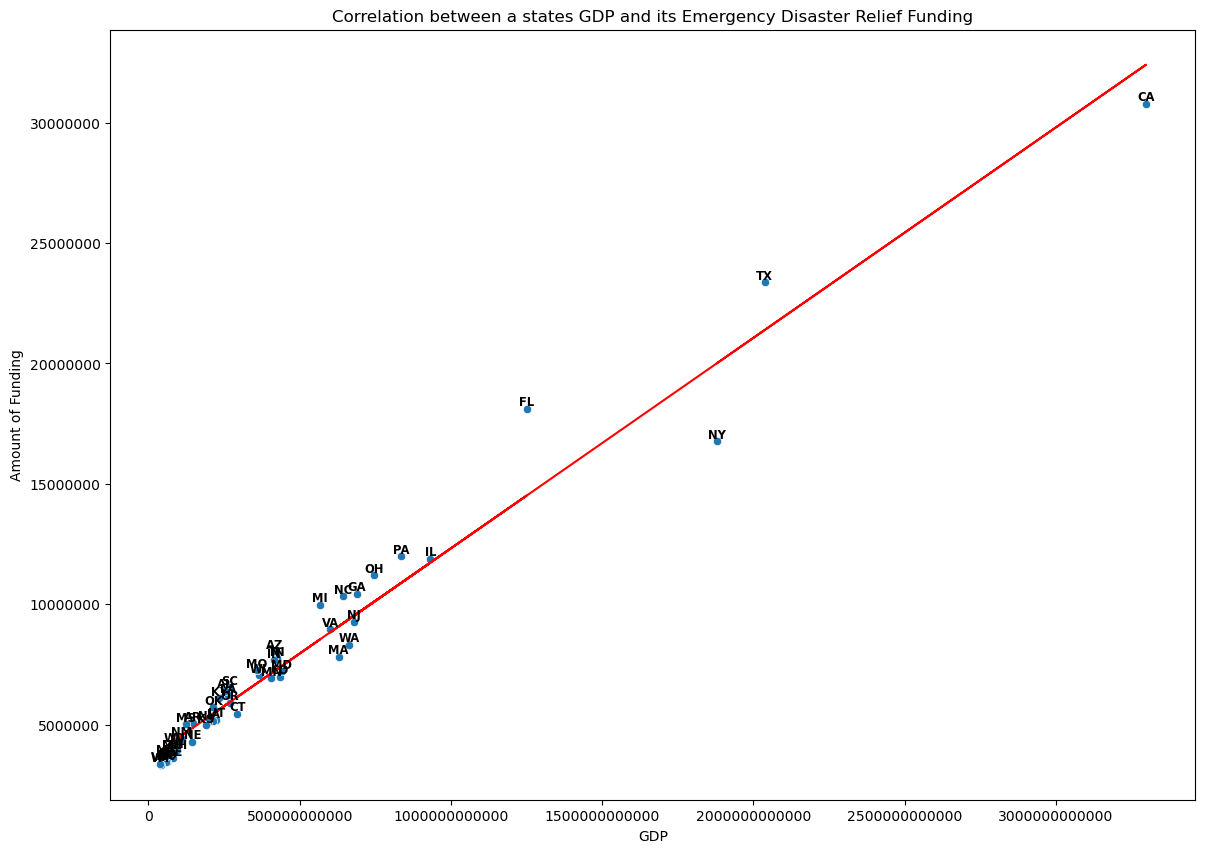

In [15]:
plt.figure(figsize =(14,10))
scatter = sns.scatterplot(
    data = pivot2,
    x = 'GDP',
    y = 'funding',
    palette= 'viridis_r'
)


for index, row in pivot2.iterrows():
    state = row['state'] # have to specify what state , x, and y are this time or raises a value error
    x = row['GDP']
    y = row['funding']
    plt.text(x, y, state, horizontalalignment='center', verticalalignment='bottom', size='small', color='black', weight='semibold')

x = pivot2['GDP']
y = pivot2['funding']
m, b = np.polyfit(x, y, 1)

# Add to plot
plt.plot(x, m*x + b, color='red')

plt.ticklabel_format(style='plain', axis='y')      
plt.ticklabel_format(style='plain', axis='x')
scatter.set_title('Correlation between a states GDP and its Emergency Disaster Relief Funding')
scatter.set_xlabel('GDP')
scatter.set_ylabel('Amount of Funding')
plt.show()

In [16]:
outcome_2, predictors_2 = patsy.dmatrices('funding ~ GDP', data= pivot2, return_type='matrix')
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

# Check the summary for results
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                funding   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1314.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.57e-36
Time:                        15:37:28   Log-Likelihood:                -760.17
No. Observations:                  50   AIC:                             1524.
Df Residuals:                      48   BIC:                             1528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.59e+06   1.78e+05     20.191      0.0

         disasters
count    50.000000
mean    277.380000
std     242.214182
min       9.000000
25%     103.750000
50%     214.000000
75%     379.500000
max    1178.000000


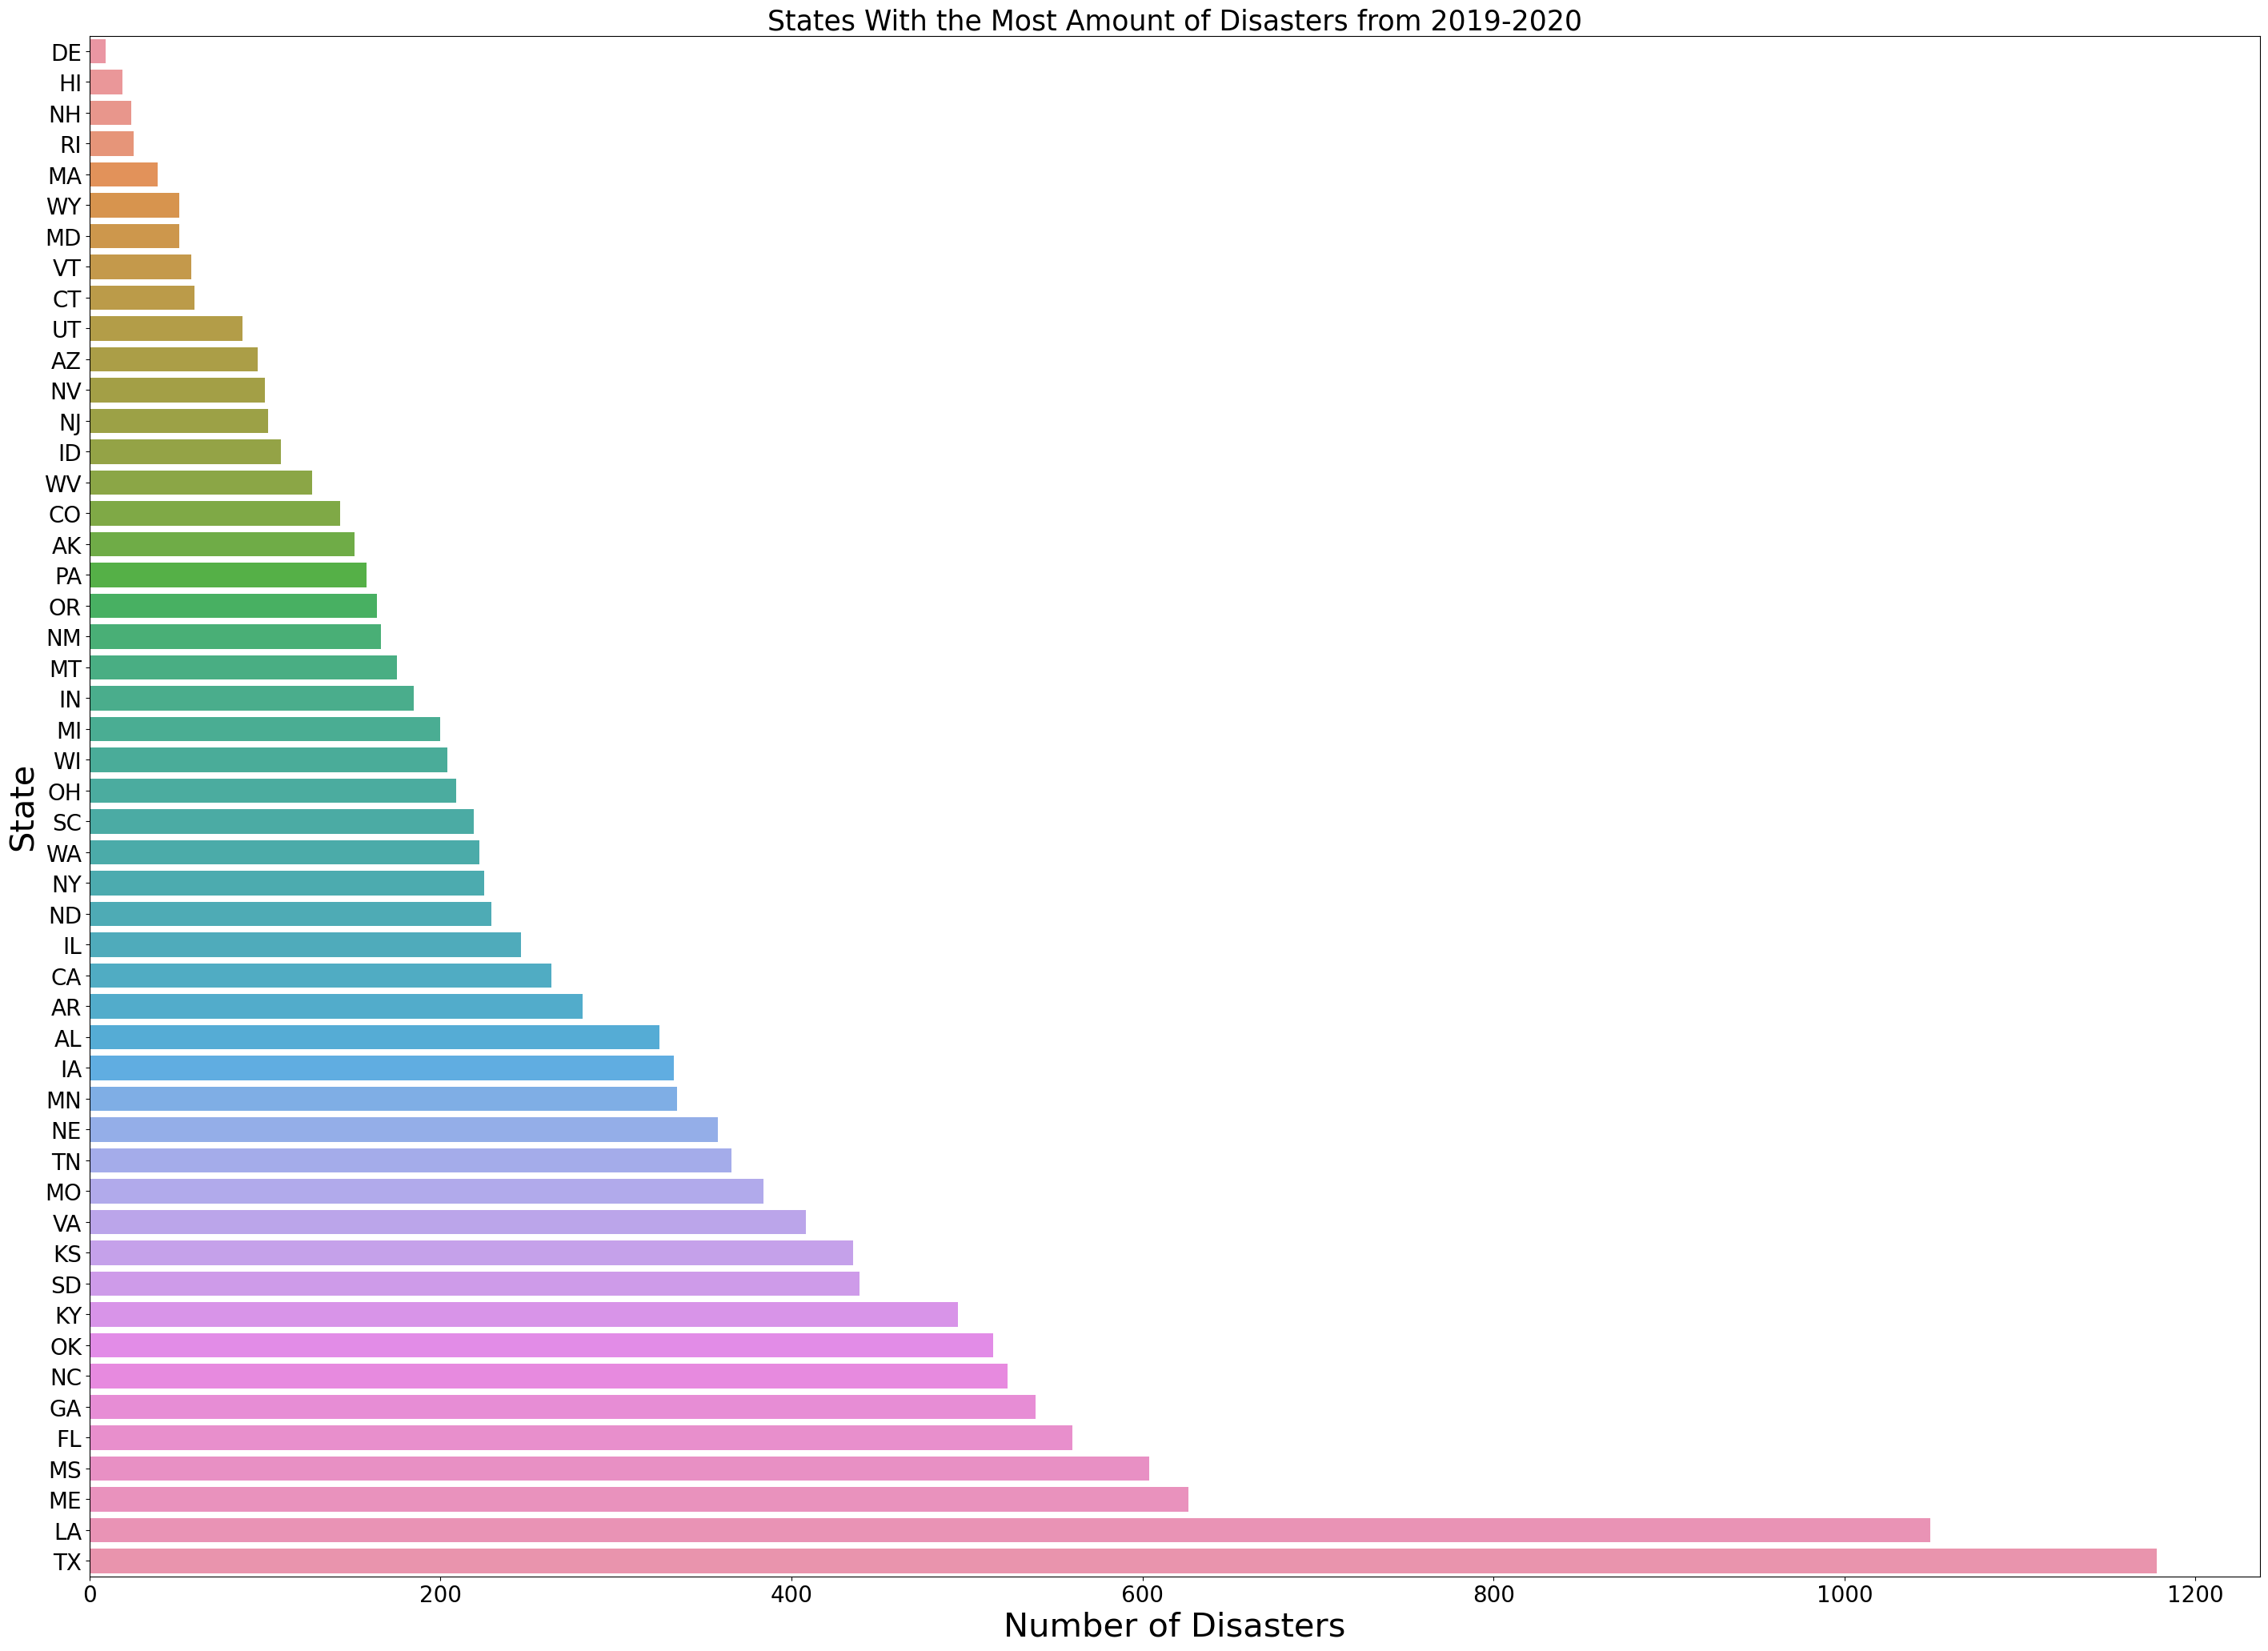

In [14]:
pivot3 = pd.pivot_table(master_df, values='disasters', index='state', aggfunc='sum').reset_index()
pivot3 = pivot3.sort_values(by='disasters')
fig, ax = plt.subplots(figsize=(35,25))
sns.barplot(x='disasters', y='state', data=pivot3, ax=ax)
print(pivot3.describe())
ax.set_title('States With the Most Amount of Disasters from 2019-2020', fontsize=25)
ax.set_xlabel('Number of Disasters', fontsize=30)
ax.set_ylabel('State', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.show()

# Ethics & Privacy

Our data is sourced from governmental agencies and nonprofit organizations such as USA Facts, FEMA, and BEA.gov. These sources aim to provide a strictly non-partisan outlook on the actions of the federal government in an effort to promote a pillar of government so necessary to any government's foundation - transparency. These sources do not contain any private data, as any data determined to be accessible to the public by the Freedom of Information act forgoes data which would be deemed a breach of privacy. Our research does not aim to harm any particular population within a county or state, as it is focused on compiling and analyzing the financial aspect of the relationship between state and federal governments. Moreover, decisions on federal funding are guided by uniform, pre-established standards, and commitments, all found within the constitution of the United States. Our compilation of statistical information lacks sufficient means to overturn the nature of this centuries old relation. Electoral data analyzed is on a strictly state-level basis, meaning that we do not utilize a voter's personal information. 

# Team Expectations 


* *Be Communicative* - Communicate any difficulties ahead of time! If assistance is needed, or maybe if a team member is unable to do/finish what they need to do, communicating it ahead of time will allow others to help expedite the process.

* *Contribute Fairly* - Uphold the responsibilities assigned or taken up by each individual group member, but also keep in mind to make key decisions as a group. 

* *Communication Guideline* - Communicate primarily through Discord and attend scheduled weekly/bi-weekly calls. Most, if not all calls will be virtual, but be present and be involved in the project.

# Project Timeline Proposal

| Meeting Date | Meeting Time | Completed Before Meeting      | Discuss at Meeting                                                                 |
|--------------|--------------|-------------------------------|------------------------------------------------------------------------------------|
| 2/4          | 6 PM         | Read Previous COGS 108 Projects | Discussed the strengths and weaknesses of two COGS 108 projects made by previous groups and noted things to keep and leave in our projects. |
| 2/8          | 3 PM         | Research Question              | Discuss hypothesis, research question, project timeline proposal                   |
| 2/11         | 6 PM         | Work on Project Proposal       | Discuss hypothesis, research question, project timeline proposal                   |
| 2/19         | 7 PM         | Find Relevant Data             | Choose which data we found best fits our research purposes                         |
| 2/22         | 8:30 PM      | Categorize Relevant Data       | Discuss what kind of further questions we want to ask within our research question |
| 3/4          | 7 PM         | Work on individual categories  | Review and discuss progress                                                        |
| 3/7          | 7 PM         | Work on individual categories  | Review and discuss progress                                                        |
| 3/14         | 7 PM         | Work on individual categories  | Review and discuss progress                                                        |
| 3/17         | 7 PM         | Work on individual categories  | Review and discuss progress                                                        |
| 3/20         | Before 11:59
